## Term Frequency - SVM Classifier

In this work, we are going to investigate Enron-Spam datasets. in the previous report, the documents in the dataset has been lemmatized.
This work means to build a non-topic model to filter spam emails and compare the performance to other 2 topics we done (see other reports).
This work mainly contains these parts: getting term frequency of each documents, use them as features implementing SVM method to get a classifier and using ROC as a metics to compare.

In [1]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [2]:
converter = lambda x: list(map(lambda y: y.strip("'"), x.strip("[]").split(", ")))
df = pd.read_csv('data.csv', converters={"Email" : converter, "Lemmatized" : converter}, index_col=0)
df

,Email,Lemmatized,Spam
0,"[christmas, tree, farm, pictures]","[christmas, tree, farm, picture]",False
1,"[calpine, daily, gas, nomination, calpine, dai...","[calpine, daily, gas, nomination, calpine, dai...",False
2,"[mcmullen, gas, jackie, since, inlet, river, p...","[mcmullen, gas, jackie, since, inlet, river, p...",False
3,"[meter, 1517, jan, 1999, george, need, followi...","[meter, 1517, jan, 1999, george, need, follow,...",False
4,"[king, ranch, two, fields, gas, difficulty, un...","[king, ranch, two, field, gas, difficulty, uni...",False
...,...,...,...
24927,"[need, vics, brand, name, meds, vics, vals, xa...","[need, vics, brand, name, med, vics, vals, xan...",True
24928,"[iso, 8859, good, news, edaliss, val, edumm, e...","[iso, 8859, good, news, edaliss, val, edumm, e...",True
24929,"[prescript, medicines, special, precise, put, ...","[prescript, medicine, special, precise, put, b...",True
24930,"[next, generation, online, pharmacy, ready, ro...","[next, generation, online, pharmacy, ready, ro...",True


In [3]:
# total number of words in the dictionary

dictionary = gensim.corpora.Dictionary(df.Lemmatized.values.tolist())
dictionary.num_pos

3095878

In [4]:
try:
    tfs = pd.DataFrame(np.zeros((24932,306406)))
except MemoryError:
    print('MemoryError: Unable to allocate 56.9 GiB for an array with shape (24932, 306406)')

MemoryError: Unable to allocate 56.9 GiB for an array with shape (24932, 306406)


Although the size of the dataset is not very large, it contains 306406 unique worlds. As a result, if we put the term freqquency of each dataframe, the size dataframe would be 24932×3095878, which exceeds the capacity of Jupyter Notebook. 

Thus, we will only train 25% of the data and test 10%. Hopefully, repeating 5 times to get the average model would make up the loss of sampling the dataset. 

Also, the dataframe has ham and spam saperated. Thus needs to shuffle rows and reset the index. 

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Email,Lemmatized,Spam
0,"[bio, tammie, schoppe, enron, americas, office...","[bio, tammie, schoppe, enron, americas, office...",False
1,"[adjusted, deal, ticket, daren, neal, effectiv...","[adjust, deal, ticket, daren, neal, effective,...",False
2,"[breaking, news, mail, margin, bottom, mail, m...","[breaking, news, mail, margin, bottom, mail, m...",True
3,"[allocation, schedule, spoke, prior, holiday, ...","[allocation, schedule, speak, prior, holiday, ...",False
4,"[get, back, please, authentic, replica, rolex,...","[get, back, please, authentic, replica, rolex,...",True
...,...,...,...
24927,"[opposite, human, promised, meeting, build, ca...","[opposite, human, promise, meeting, build, cap...",True
24928,"[industrials, november, industrial, spreadshee...","[industrials, november, industrial, spreadshee...",False
24929,"[portland, office, name, tim, belden, manage, ...","[portland, office, name, tim, belden, manage, ...",False
24930,"[get, bus, gbvzzzz, click, see, bang, busit, w...","[get, bus, gbvzzzz, click, see, bang, busit, w...",True


In [6]:
# k_fold 

# k_fold_indexs = pd.DataFrame(columns = ['train_index','test_index'])

# from sklearn.model_selection import KFold  
# import numpy as np  
# X = df[['Email','Lemmatized']] 
# y = df['Spam'] 
# kf = KFold(n_splits=10,shuffle=True) 
# i = 0
# for train_index , test_index in kf.split(X):  
#     k_fold_indexs.at[i,'train_index'] = train_index
#     k_fold_indexs.at[i,'test_index'] = test_index
#     i+=1
# k_fold_indexs

In [7]:
# train0 = df.loc[list(k_fold_indexs['train_index'][0])]
# test0 = df.loc[list(k_fold_indexs['test_index'][0])]


In [8]:
for i in range(5):
    locals()['train_{}'.format(i)]=df.sample(frac=0.25)
    locals()['test_{}'.format(i)]=df.sample(frac = 0.1)


In [9]:
train_0

,Email,Lemmatized,Spam
21660,"[thank, would, like, take, brief, opportunity,...","[thank, would, like, take, brief, opportunity,...",False
4602,"[vision, values, meeting, summary, may, meetin...","[vision, value, meet, summary, may, meeting, e...",False
232,"[lonely, house, cleaning, lady, look, date, on...","[lonely, house, clean, lady, look, date, onlin...",True
8064,"[get, rid, premature, ejaculation, last, longe...","[get, rid, premature, ejaculation, last, long,...",True
19350,"[increase, cum, volume, orgasm, length, main, ...","[increase, cum, volume, orgasm, length, main, ...",True
...,...,...,...
15664,"[fifty, dollars, office, hannibal, microsoft, ...","[fifty, dollar, office, hannibal, microsoft, s...",True
15228,"[want, cheap, watch, http, itq, dimur, com]","[want, cheap, watch, http, itq, dimur, com]",True
13146,"[transition, research, group, update, vince, w...","[transition, research, group, update, vince, w...",False
2515,"[talk, last, several, years, received, numerou...","[talk, last, several, year, receive, numerous,...",False


In [10]:
train_words_0 = train_0.Lemmatized.values.tolist()

In [11]:
dictionary_0 = gensim.corpora.Dictionary(train_words_0)
corpus_0 = [dictionary_0.doc2bow(text) for text in train_words_0]

In [12]:
corpus_0[5]

[(42, 1),
 (130, 1),
 (136, 1),
 (143, 2),
 (159, 1),
 (231, 1),
 (310, 1),
 (311, 1),
 (312, 1),
 (313, 1),
 (314, 1),
 (315, 1),
 (316, 1),
 (317, 1),
 (318, 2),
 (319, 1),
 (320, 2),
 (321, 1),
 (322, 1)]

In [14]:
len(corpus_0) == train_0.shape[0]

True

In [15]:
dic = dict(corpus_0[0])
dic

{0: 4,
 1: 9,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 2,
 23: 1,
 24: 2,
 25: 1,
 26: 1,
 27: 2,
 28: 5,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 3,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 3,
 46: 1,
 47: 1,
 48: 1,
 49: 2,
 50: 1,
 51: 1,
 52: 2,
 53: 1,
 54: 1,
 55: 3,
 56: 1,
 57: 3,
 58: 1,
 59: 1,
 60: 2,
 61: 1,
 62: 1,
 63: 2,
 64: 1,
 65: 3,
 66: 2,
 67: 3,
 68: 1,
 69: 2,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 12,
 76: 1,
 77: 8,
 78: 1,
 79: 1,
 80: 1,
 81: 7,
 82: 2,
 83: 2,
 84: 4,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 6,
 100: 2,
 101: 4,
 102: 5,
 103: 1,
 104: 1,
 105: 1,
 106: 2,
 107: 13,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 2,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 7,
 119: 1,
 120: 2,
 121: 1,
 122: 2,
 

In [80]:
# This takea long time

# tfs = pd.DataFrame(columns = list(range(train_0.shape[0])))
# for i in list(train0.index)[:100]:
tfs = pd.DataFrame()
for i in range(len(corpus_0)):
    dic = dict(corpus_0[i])
    for key in dic.keys():
        tfs.at[i,key] = dic[key]


In [62]:
# Due to the large size of the dataframe, python sometimes losts rows. 
# This particularly happens when the rows with corresponding to the document contains single word, so filling the missing row woun't have large effect to the classifier. 

if tfs.shape[0] != train_0.shape[0]:
    for i in range(train_o.shape[0]):
        tf.at[i] = None

In [17]:
tfs

,0,1,2,3,4,5,6,7,8,9,...,61392,61393,61394,61395,61396,61397,61398,61399,61400,61401
0,4.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
tfs.index = list(train_0.index)

In [19]:
tfs

,0,1,2,3,4,5,6,7,8,9,...,61392,61393,61394,61395,61396,61397,61398,61399,61400,61401
17875,4.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
tfs['Spam'] = train_0.Spam

In [21]:
tfs

,0,1,2,3,4,5,6,7,8,9,...,61393,61394,61395,61396,61397,61398,61399,61400,61401,Spam
17875,4.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6023,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
18994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
12728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
11103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
17506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [22]:
tfs = tfs.fillna(0)
tfs

,0,1,2,3,4,5,6,7,8,9,...,61393,61394,61395,61396,61397,61398,61399,61400,61401,Spam
17875,4.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
6023,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
18994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
12728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
11103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
17506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
7514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
5307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [23]:
tfs.shape[1]

61403

In [24]:
tfs.iloc[:, range(tfs.shape[1]-1)]

,0,1,2,3,4,5,6,7,8,9,...,61392,61393,61394,61395,61396,61397,61398,61399,61400,61401
17875,4.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6023,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
clf = svm.SVC()
fit = clf.fit(tfs.iloc[:, range(tfs.shape[1]-1)], tfs.iloc[:, tfs.shape[1]-1].to_frame())


D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


On testing the new documents, unseen term will be ignored since they are not included in the model:

In [26]:
test_tf = pd.DataFrame(columns = list(range(tfs.shape[1]-1)))
# test_tf = pd.DataFrame()
for i in range(len(test_0)):
# for i in range(10):

    test_corpus_dict = dict(dictionary_0.doc2bow(test_0.Lemmatized.iloc[i]))
    for key in test_corpus_dict:
        test_tf.at[i,key] = test_corpus_dict[key]
test_tf

,0,1,2,3,4,5,6,7,8,9,...,61392,61393,61394,61395,61396,61397,61398,61399,61400,61401
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_tf = test_tf.sort_index(axis = 1)
test_tf

,0,1,2,3,4,5,6,7,8,9,...,61392,61393,61394,61395,61396,61397,61398,61399,61400,61401
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Due to the large size of the dataframe, python sometimes losts rows. 
# This particularly happens when the rows with corresponding to the document contains single word. 

for i in range(test_0.shape[0]):
    if i not in test_tf.index:
        test_tf.loc[i] = None

In [47]:
# test_tf = pd.DataFrame(columns = list(range(tfs.shape[1])))
test_tf.shape

(2493, 61402)

In [48]:
tfs.shape[1] == test_tf.shape[1]+1
# tfs.shape

True

In [49]:
# x_test = tfs.iloc[:, range(tfs.shape[1]-1)].fillna(0)
x_test = test_tf.fillna(0)
y_test = test_0.Spam

In [50]:
pred = clf.predict(x_test)

In [51]:
pred.shape

(2493,)

In [52]:
y_test.shape

(2493,)

In [53]:
x_test.shape

(2493, 61402)

In [54]:

conf_mat = confusion_matrix(y_test, pred)

In [55]:
conf_mat

array([[ 810,  175],
       [  48, 1460]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9105495387083835

In [56]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, _ = precision_recall_curve(test_0.Spam, pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)

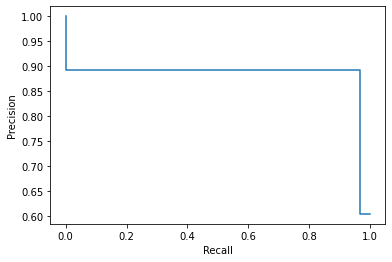

In [60]:
curve.plot()


In [59]:
roc_auc_score(y_test, pred)

0.89525239332696

In [58]:
support_0 = clf.support_
nsupport_0 = clf.n_support_

We tried optimising the model by repeating as we are running in a rather smaller scale but this process took too long and this is not the main goal of this assignment. As the result we only run another time below:

In [ ]:
Do another 4 time:

for j in range(1,5):

    try:

        print('The '+str(j)+'-th round starts')

        train = locals()['train_{}'.format(j)]
        test = locals()['test_{}'.format(j)]

        train_words = train.Lemmatized.values.tolist()
        # locals()['train_words_{}'.format(i)] = locals()['train_{}'.format(i)].Lemmatized.values.tolist()


        locals()['dictionary_{}'.format(j)] = gensim.corpora.Dictionary(train_words)
        dictionary = locals()['dictionary_{}'.format(j)]

        locals()['corpus_{}'.format(j)] = [dictionary.doc2bow(text) for text in train_words]
        corpus = locals()['corpus_{}'.format(j)]


        tfs = pd.DataFrame()
        for i in range(len(corpus)):
            dic = dict(corpus[i])
            for key in dic.keys():
                tfs.at[i,key] = dic[key]


        tfs.index = list(train.index)


        tfs['Spam'] = train.Spam


        tfs = tfs.fillna(0)



        clf = svm.SVC()
        fit = clf.fit(tfs.iloc[:, range(tfs.shape[1]-1)], tfs.iloc[:, tfs.shape[1]-1].to_frame())

        locals()['support_{}'.format(j)] = clf.support_
        locals()['nsupport_{}'.format(j)] = clf.n_support_

        test_tf = pd.DataFrame(columns = list(range(tfs.shape[1]-1)))
        # test_tf = pd.DataFrame()
        for i in range(len(test)):

            test_corpus_dict = dict(dictionary.doc2bow(test.Lemmatized.iloc[i]))
            for key in test_corpus_dict:
                test_tf.at[i,key] = test_corpus_dict[key]

        test_tf = test_tf.sort_index(axis = 1)

        x_test = test_tf.fillna(0) 
        y_test = test.Spam
        pred = clf.predict(x_test)
        conf_mat = confusion_matrix(test.Spam, pred)
        locals()['conf_mat_'.format(i)] = conf_mat


        print(str(j)+ '-th confusioin matrix is: ')
        print(conf_mat)

        precision, recall, _ = precision_recall_curve(y_test, pred)
        curve = PrecisionRecallDisplay(precision=precision, recall=recall)

        print(str(j)+ '-th ROC is: ')
        print(curve.plot())
    except ValueError:
        j = j-1